# <center>SUV Data Analysis</cenetr>

### Modules

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Initializing the dataframe

In [2]:
df = pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Visualizing the relationship between the data features

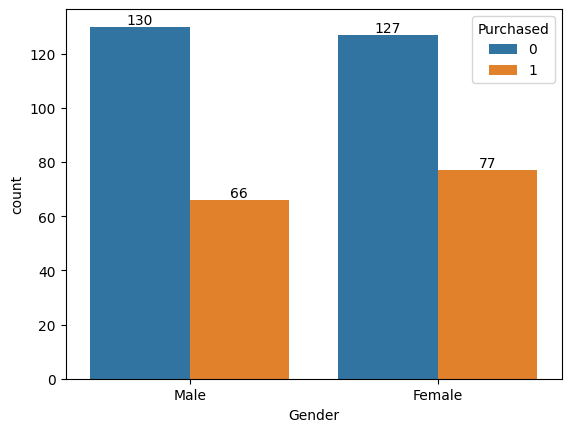

In [7]:
ax = sns.countplot(data=df, hue='Purchased', x='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Clearly, both the genders have equal chances of purchasing the SUV so the Gender Column can be neglected.

In [20]:
df.drop(columns=['User ID', 'Gender'], inplace=True)

### Logistic Regression - Training the model

In [22]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
regressor = LogisticRegression(random_state=0)
regressor.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = regressor.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.87

Hence, our regression model is 87% accurate.

#### Checking the possibility of purchasing the SUV using my own data

In [46]:
uncle_sam = [60, 2000]

uncle_sam_prediction = regressor.predict([uncle_sam])

if (uncle_sam_prediction):
    print("Uncle Sam can buy a SUV")
else:
    print("Uncle Sam cannot buy a SUV")

Uncle Sam can buy a SUV
